**NLP-Based Phishing Email Classification System**

In [10]:
# Import required libraries for data handling, preprocessing, modeling, and evaluation

import re                         # for text cleaning using regular expressions
import pandas as pd              # for handling dataset
import matplotlib.pyplot as plt  # for plotting confusion matrix

# Machine Learning / NLP libraries
from sklearn.model_selection import train_test_split   # to split dataset
from sklearn.feature_extraction.text import TfidfVectorizer  # to convert text to numeric features
from sklearn.linear_model import LogisticRegression     # classification model
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report  # evaluation

# This ensures plots display inside Jupyter/Colab
%matplotlib inline


In [11]:
# Load dataset from CSV file
# The dataset should have two columns:
# 'text' -> email content
# 'label' -> 1 = spam/phishing, 0 = legitimate email

df = pd.read_csv("emails.csv")

# Display first 5 rows of dataset to understand structure
df.head()


,text,label
0,"Dear user, your account has been suspended. Cl...",1
1,Congratulations! You have won a lottery. Claim...,1
2,Urgent: update your bank details to avoid acco...,1
3,Limited time offer! Buy now and get 50% discount,1
4,Your PayPal account needs verification. Login ...,1


In [12]:
# Function to clean and normalize email text
def clean_email(text: str) -> str:

    # Convert input to string (to avoid errors)
    text = str(text)

    # Remove HTML tags (if emails contain HTML formatting)
    text = re.sub(r"<[^>]+>", " ", text)

    # Replace URLs with a standard token 'URL'
    # This helps model learn link patterns instead of exact links
    text = re.sub(r"http\S+|www\.\S+", " URL ", text)

    # Remove extra spaces
    text = re.sub(r"\s+", " ", text).strip()

    # Convert text to lowercase for consistency
    return text.lower()

# Apply cleaning function to all emails
df["clean_text"] = df["text"].apply(clean_email)

# Show cleaned text
df[["text", "clean_text", "label"]].head()


,text,clean_text,label
0,"Dear user, your account has been suspended. Cl...","dear user, your account has been suspended. cl...",1
1,Congratulations! You have won a lottery. Claim...,congratulations! you have won a lottery. claim...,1
2,Urgent: update your bank details to avoid acco...,urgent: update your bank details to avoid acco...,1
3,Limited time offer! Buy now and get 50% discount,limited time offer! buy now and get 50% discount,1
4,Your PayPal account needs verification. Login ...,your paypal account needs verification. login ...,1


In [13]:
# Separate features (X) and labels (y)
X = df["clean_text"]   # input text
y = df["label"]        # output labels (spam or ham)

# Split dataset into training and testing sets
# 80% training, 20% testing
# stratify=y ensures both classes are balanced in split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Print sizes of split datasets
print("Training samples:", len(X_train))
print("Testing samples:", len(X_test))


Training samples: 12
Testing samples: 3


In [14]:
# Convert text into numerical vectors using TF-IDF
# TF-IDF gives higher weight to important words

tfidf = TfidfVectorizer(
    stop_words="english",   # remove common words like 'the', 'is'
    ngram_range=(1, 2),     # use single words and pairs of words (bigrams)
    max_features=30000      # limit features for efficiency
)

# Fit on training data and transform both train and test data
X_train_vec = tfidf.fit_transform(X_train)
X_test_vec = tfidf.transform(X_test)

# Print shape of resulting matrices
print("TF-IDF Train shape:", X_train_vec.shape)
print("TF-IDF Test shape:", X_test_vec.shape)


TF-IDF Train shape: (12, 115)
TF-IDF Test shape: (3, 115)


In [15]:
# Print classification report
# It shows precision, recall, F1-score, and support

print("Classification Report:\n")
print(classification_report(y_test, pred))


Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



Confusion Matrix:
 [[1 0]
 [0 2]]


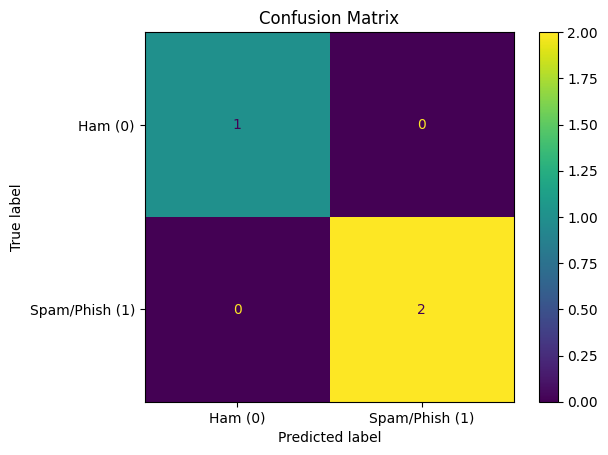

In [16]:
# Compute confusion matrix
cm = confusion_matrix(y_test, pred)

# Print confusion matrix values
print("Confusion Matrix:\n", cm)

# Plot confusion matrix for visualization
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=["Ham (0)", "Spam/Phish (1)"])

disp.plot()

# Add title
plt.title("Confusion Matrix")

# Show plot
plt.show()


In [17]:
# Get feature names (words)
feature_names = tfidf.get_feature_names_out()

# Get model coefficients
# Positive values -> spam/phishing
# Negative values -> legitimate emails
coefs = model.coef_[0]

# Get top 10 spam-indicative words
top_spam = coefs.argsort()[-10:][::-1]

# Get top 10 ham-indicative words
top_ham = coefs.argsort()[:10]

print("Top Spam/Phishing Indicators:")
print([feature_names[i] for i in top_spam])

print("\nTop Ham Indicators:")
print([feature_names[i] for i in top_ham])


Top Spam/Phishing Indicators:
['link', 'account', 'password', 'iphone clicking', 'clicking link', 'clicking', 'free iphone', 'free', 'iphone', 'win']

Top Ham Indicators:
['attached', 'project', 'let', 'invoice attached', 'invoice', 'attached review', 'review', 'deadline', 'reminder', 'reminder submit']
